## 1. Import dependent libraries

In [4]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential


In [5]:
# Data file path
FILE_PATH = '/content/Iris.csv'

# Dataframe from csv file
iris_data = pd.read_csv(FILE_PATH, header=0)

In [6]:
iris_data.info()
print("=="*40)
iris_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## 2. Preparing dataset

In [7]:
X = iris_data.loc[:, iris_data.columns != 'Species']
y = iris_data.loc[:, ['Species']]

In [8]:
y_enc = LabelEncoder().fit_transform(y) # converting categorical data to numerical
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc) # numerical to 1 hot encoding

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Dataset will be prepared by the tensorflow `from_tensor_slice()` method.

In [9]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_label, test_size=0.15)

# Validation set
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [10]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 5), Y Train : (105, 3)
(5,)


In [11]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(500, activation='relu'),
        keras.layers.Dense(200, activation='relu',),
        keras.layers.Dense(3, activation='softmax') # ye output hai 3 because number of classes is 3
    ])

    return model

In [12]:
model = get_model()

# Compile the model
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               3000      
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 3)                 603       
                                                                 
Total params: 103,803
Trainable params: 103,803
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 1s 71ms/step - loss: 2.6913 - accuracy: 0.3429 - val_loss: 2.4970 - val_accuracy: 0.3111
Epoch 2/30
4/4 [==============================] - 0s 15ms/step - loss: 2.5413 - accuracy: 0.3048 - val_loss: 1.9380 - val_accuracy: 0.3556
Epoch 3/30
4/4 [==============================] - 0s 19ms/step - loss: 1.5309 - accuracy: 0.3524 - val_loss: 1.3424 - val_accuracy: 0.5556
Epoch 4/30
4/4 [==============================] - 0s 11ms/step - loss: 1.3660 - accuracy: 0.7143 - val_loss: 1.8483 - val_accuracy: 0.5556
Epoch 5/30
4/4 [==============================] - 0s 12ms/step - loss: 0.9120 - accuracy: 0.6381 - val_loss: 0.5696 - val_accuracy: 0.7556
Epoch 6/30
4/4 [==============================] - 0s 11ms/step - loss: 0.7391 - accuracy: 0.6762 - val_loss: 0.7953 - val_accuracy: 0.6222
Epoch 7/30
4/4 [==============================] - 0s 11ms/step - loss: 0.4769 - accuracy: 0.8000 - val_loss: 0.5001 - val_accuracy: 0.8000
Epoch 8/30
4/4 [===========

In [15]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3144 - accuracy: 0.8222


[0.31439292430877686, 0.8222222328186035]

## Performance Monitor

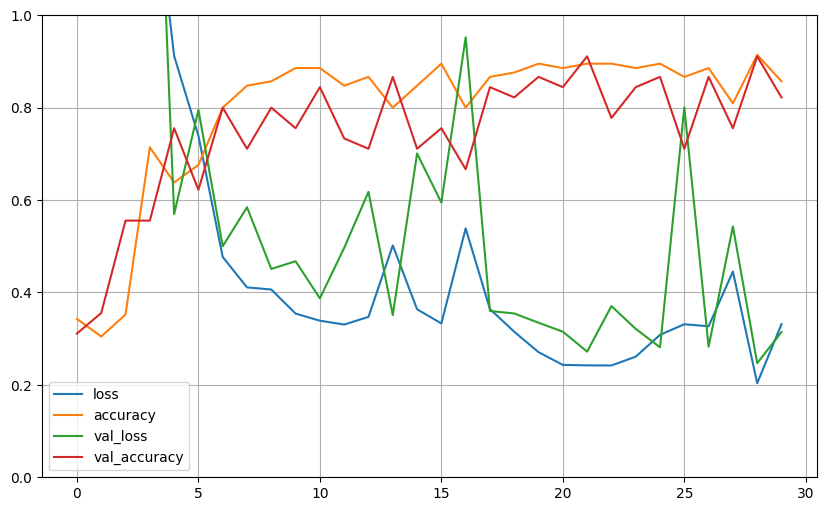

In [16]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()